# Data Exploration

# plot data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

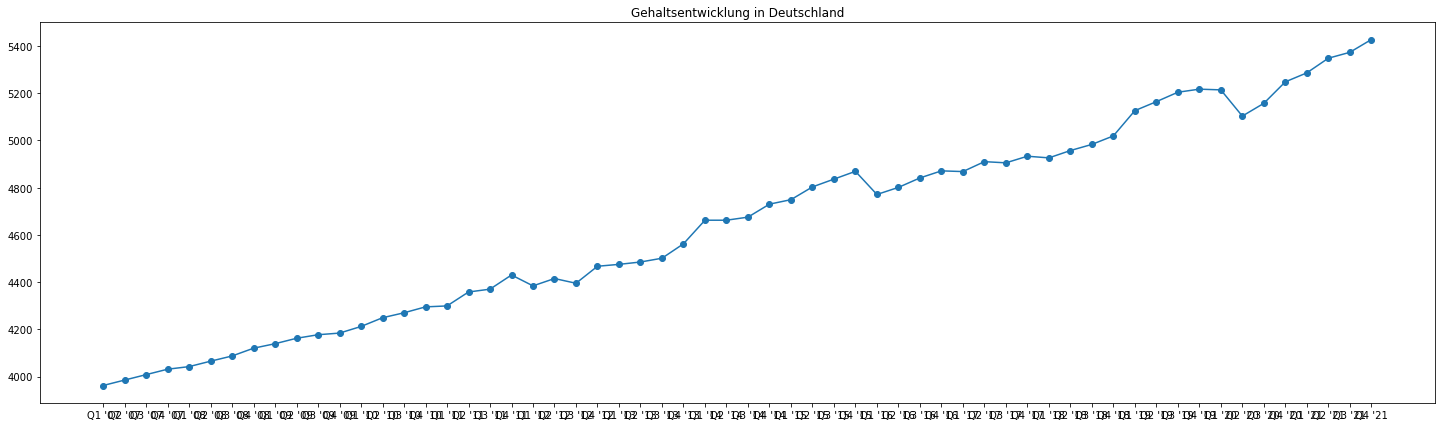

In [3]:
monatsverdienst = pd.read_excel("Monatsverdienst.xlsx")
y = monatsverdienst["Gehalt"]
x = monatsverdienst["Quartal"]

plt.plot(x,y,marker="o")
plt.gcf().set_size_inches(25, 7)
plt.title('Gehaltsentwicklung in Deutschland')
plt.show()

# predict future data

In [4]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
# read excel and show data types
data = pd.read_excel("Monatsverdienst.xlsx")
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

  Quartal  Gehalt
0  Q1 '07    3962
1  Q2 '07    3985
2  Q3 '07    4008
3  Q4 '07    4031
4  Q1 '08    4042

 Data Types:
Quartal    object
Gehalt      int64
dtype: object


In [6]:
from datetime import datetime

#convert into Time Series Object (datetime) and set as index
con=data['Quartal']
data['date'] = '20' + data['Quartal'].str[4:6] + '-' + data['Quartal'].str[0:2].to_numpy()
data['date'] = pd.PeriodIndex( data['date'].to_numpy(), freq='Q').to_timestamp()
data.set_index('date', inplace=True)

##check datatype of index
data.index

DatetimeIndex(['2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
      

In [7]:
#convert to time series (not df):
ts = data['Gehalt']
ts.head(10)

date
2007-01-01    3962
2007-04-01    3985
2007-07-01    4008
2007-10-01    4031
2008-01-01    4042
2008-04-01    4065
2008-07-01    4087
2008-10-01    4120
2009-01-01    4139
2009-04-01    4162
Name: Gehalt, dtype: int64

### Test for stationarity

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics of last 12 month
    rolmean = data.rolling(12).mean()
    rolstd = data.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.gcf().set_size_inches(25, 7)
    plt.show()
    
    #Perform Dickey-Fuller test (in order to check stationarity):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
        # we want test statistic less than critical value --> states that ts is stationary

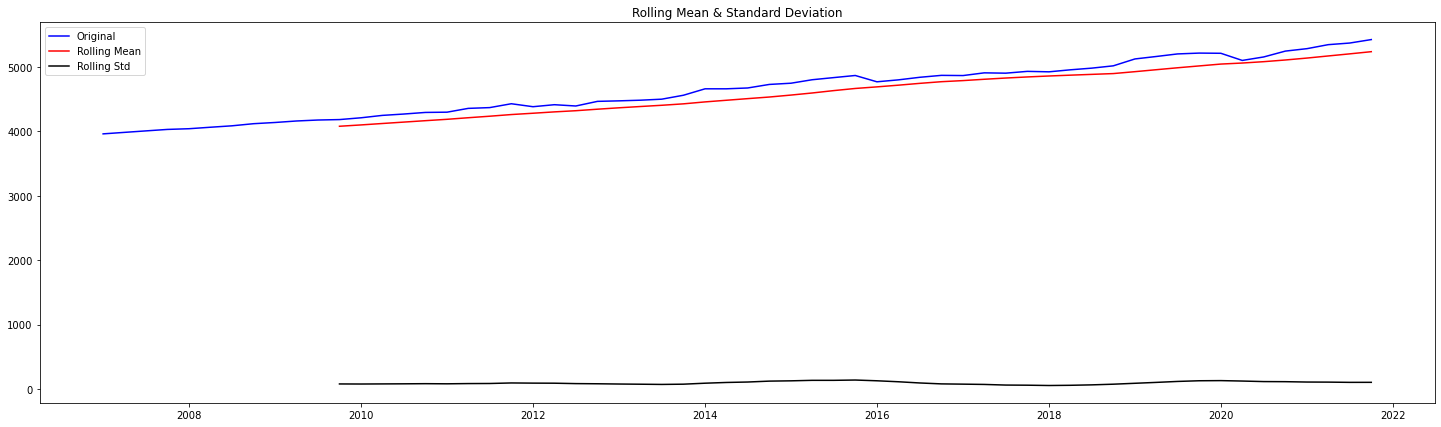

Results of Dickey-Fuller Test:
Test Statistic                  0.297657
p-value                         0.977237
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [9]:
test_stationarity(ts)

--> Data is not stationary

### Trend

In [10]:
#reducing trend
ts_log = np.log(ts)

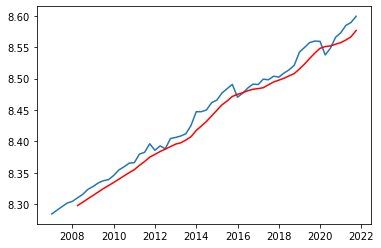

In [11]:
#smoothing mean
moving_avg = ts_log.rolling(6).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color="red")

In [12]:
#subtract rolling mean
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2008-04-01    0.012289
2008-07-01    0.012510
2008-10-01    0.014999
2009-01-01    0.014240
2009-04-01    0.014451
Name: Gehalt, dtype: float64

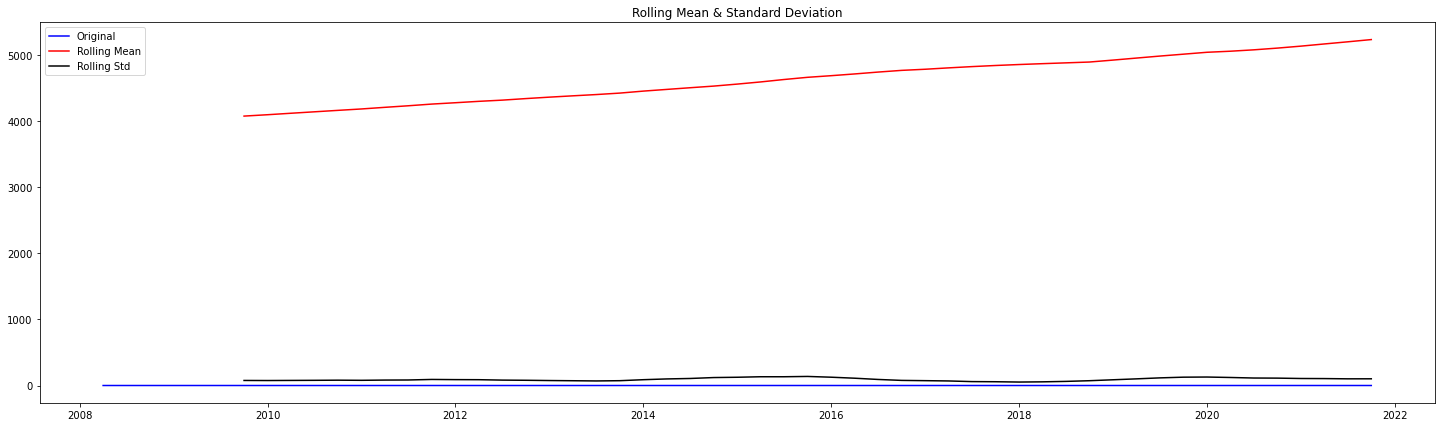

Results of Dickey-Fuller Test:
Test Statistic                 -4.534710
p-value                         0.000170
#Lags Used                      2.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [13]:
#check test stationarity again
test_stationarity(ts_log_moving_avg_diff)

### difference

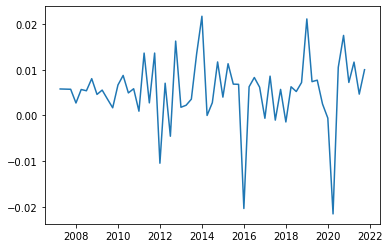

In [14]:
#Take first difference
ts_log_diff = ts_log - ts_log.shift()
#ts_log_diff = ts_log 
plt.plot(ts_log_diff)

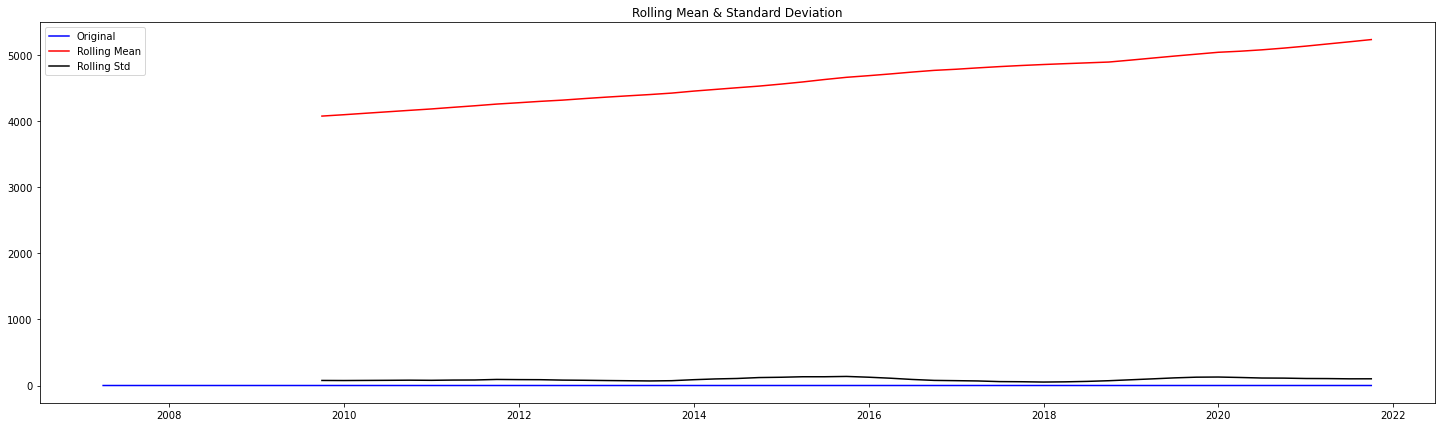

Results of Dickey-Fuller Test:
Test Statistic                -8.163781e+00
p-value                        8.996496e-13
#Lags Used                     0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


In [15]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### seasonality

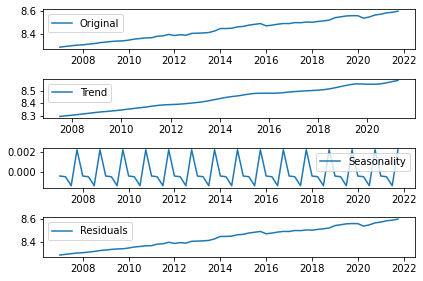

In [16]:
#check for seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_log, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

There is no significant seasonality, which makes sense considering the context

### Use ARIMA to forecast

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


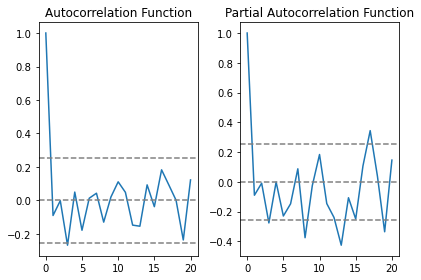

In [17]:
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/(np.sqrt(len(ts_log_diff))), linestyle='--', color='gray')
plt.axhline(y=1.96/(np.sqrt(len(ts_log_diff))), linestyle='--', color='gray')
plt.title('Autocorrelation Function')     

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/(np.sqrt(len(ts_log_diff))), linestyle='--', color='gray')
plt.axhline(y=1.96/(np.sqrt(len(ts_log_diff))), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function') 
            
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 0.0032')

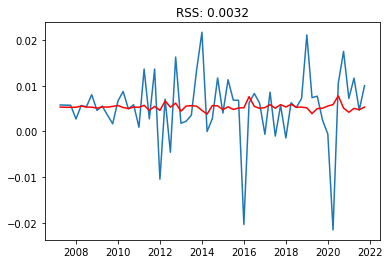

In [18]:
# MA model:
model = ARIMA(ts_log, order=(2, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 0.0032')

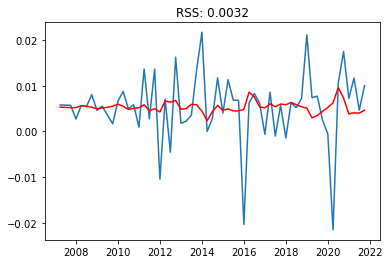

In [19]:
# MA model:
model = ARIMA(ts_log, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).c

Text(0.5, 1.0, 'RSS: 0.0027')

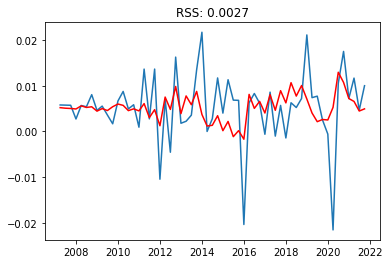

In [20]:
# ARIMA model

# ARIMA model:
model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

--> ARIMA has best (lowest) RSS values 

In [21]:
# get predictions
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2007-04-01    0.005200
2007-07-01    0.005082
2007-10-01    0.005022
2008-01-01    0.004914
2008-04-01    0.005594
dtype: float64

In [22]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
2007-04-01    0.005200
2007-07-01    0.010282
2007-10-01    0.015304
2008-01-01    0.020218
2008-04-01    0.025812
dtype: float64

In [23]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2007-01-01    8.284504
2007-04-01    8.289704
2007-07-01    8.294786
2007-10-01    8.299808
2008-01-01    8.304722
dtype: float64

Text(0.5, 1.0, 'RMSE: 81.3493')

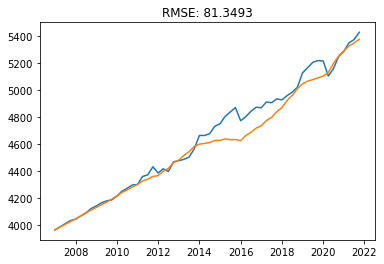

In [24]:
# print predictions
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts)**2)/len(ts)))

## forecast new values:

In [25]:
# save predictions as df
df0= predictions_ARIMA.to_frame()
df = df0.rename(columns = {0:"Gehalt"})
df.head()

,Gehalt
date,
2007-01-01,3962.000000
2007-04-01,3982.655251
2007-07-01,4002.948414
2007-10-01,4023.100948
2008-01-01,4042.918260


In [26]:
#create timestamps for future values
last_date = (df.index[-1]).strftime('%Y-%m-%d')
future_dates = pd.period_range(last_date, periods=10, freq='3M')
future_dates

PeriodIndex(['2021-10', '2022-01', '2022-04', '2022-07', '2022-10', '2023-01',
             '2023-04', '2023-07', '2023-10', '2024-01'],
            dtype='period[3M]', freq='3M')

In [27]:
future_dates = future_dates.to_timestamp()
future_dates

DatetimeIndex(['2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01',
               '2022-10-01', '2023-01-01', '2023-04-01', '2023-07-01',
               '2023-10-01', '2024-01-01'],
              dtype='datetime64[ns]', freq='QS-OCT')

In [28]:
# one-step out-of sample forecast
forecast = np.exp(results_ARIMA.forecast(steps=10)[0])
forecast

array([5443.27605583, 5466.55796882, 5488.45202389, 5515.49757582,
       5540.2726021 , 5569.21461046, 5595.57083615, 5625.52685403,
       5652.84449849, 5683.39896311])

In [29]:
# create new df with future dates and forecast
new_df = pd.DataFrame({"date": future_dates, 
                      "Gehalt": forecast})
new_df = new_df.set_index("date")
new_df

,Gehalt
date,
2021-10-01,5443.276056
2022-01-01,5466.557969
2022-04-01,5488.452024
2022-07-01,5515.497576
2022-10-01,5540.272602
2023-01-01,5569.214610
2023-04-01,5595.570836
2023-07-01,5625.526854
2023-10-01,5652.844498


In [30]:
m_df = df.append(new_df)
m_df

,Gehalt
date,
2007-01-01,3962.000000
2007-04-01,3982.655251
2007-07-01,4002.948414
2007-10-01,4023.100948
2008-01-01,4042.918260
...,...
2023-01-01,5569.214610
2023-04-01,5595.570836
2023-07-01,5625.526854


<ipython-input-50-b6fc11d62d3f>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


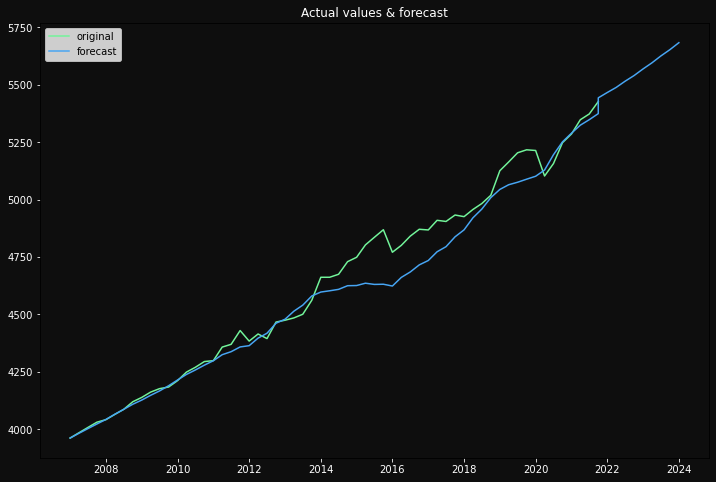

In [50]:
#plot forecast in comparison to actual values
plt.figure(facecolor='#0e0e0e') 
plt.plot(ts, color="#72f49a",label='original', )
plt.plot(m_df, color='#47A5F3', label='forecast')
plt.legend(loc='best')
plt.title('Actual values & forecast', color='white')
ax = plt.axes() 
ax.set_facecolor("#0e0e0e")
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
plt.gcf().set_size_inches(12, 8)